In [2]:
import numpy as np
import pandas as pd

## Download the opencv 

In [3]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


## (i) Read the zebra image

In [7]:
import cv2
import matplotlib.pyplot as plt

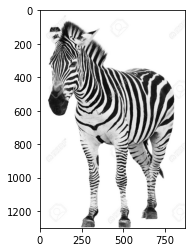

In [8]:
m = cv2.imread('zebra.jpg')
plt.imshow(m)
plt.show()


## (ii) Convert the colored image into a gray level image

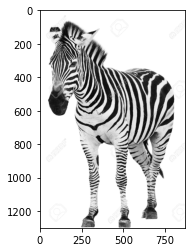

In [9]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

#img = mpimg.imread('test.jpg')

R, G, B = m[:,:,0], m[:,:,1], m[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')
plt.show()


## (iii) Show how many unique elements does image matrix from (ii) have

In [10]:
data=pd.DataFrame(imgGray)
a=np.unique(imgGray)
print('the grayscale image has',len(a),'unique element')

the grayscale image has 256 unique element


## (iv) Perform the SVD on the image-matrix of the gray-level image

In [11]:
U,sigma,V=np.linalg.svd(imgGray)

## (v) Approximate gray level image matrix by its SVD from (iv) taking different numbers of singular values to display the (a) 30% (b) 50% (c) 80% compressions of the image, respectively

In [12]:
len(sigma)  
# np.linalg.eigvals(sigma)
sigma.shape

(866,)

$len(sigma)=866$  $\dfrac{30\times 866}{100}=259.8$, $\dfrac{50\times 866}{100}=433$ and $\dfrac{80\times 866}{100}=692$

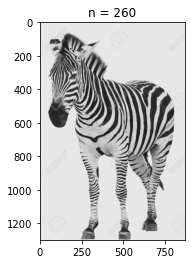

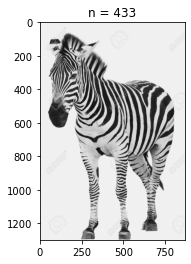

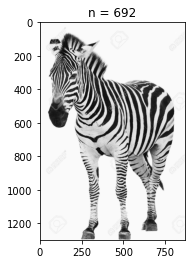

In [13]:
for i in [260,433,692]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

## Download Pytorch

In [14]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [15]:
import torch
import numpy as np

In [16]:
torch.version.cuda

'10.2'

## 2. Given the Rosenbrock function $f:\mathcal{R}^{n}\to\mathcal{R} $
\begin{align*}
	f(x)=\sum_{i=1}^{n-1}\left[100(x_{i+1}-x_{i}^{2})^{2}+(1-x_{i})^{2}\right]
\end{align*}

### (i) Use jupyter to define f(x) under the PyTorch machine learning framework.

In [17]:
def f(x):
    s=0
    for i in range(len(x)-1):
        s=s+100*(x[i+1]-x[i]**2)**2+(1-x[i])**2
    return s

### (ii) Write a Python function to computer the gradient of this function for n = 10 using the Automatic differentiation toolbox under PyTorch.

In [18]:
def grad(x):
    y=f(x)
    y.backward()
    return x.grad

 ### (iii) Evaluate the gradient at the point $x = (1, 1,\dots, 1) \in \mathbb{R}^{10}$

In [19]:
x=torch.ones(10,requires_grad=True)
print('the gradient at',x,'is',grad(x))

the gradient at tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) is tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [20]:
x=torch.tensor([1.0,2.0,5.7],requires_grad=True)
grad(x)

tensor([ -400.0000, -1157.9999,   340.0000])

### 3. Web searching: What is the Google Matrix? What is Page Ranking (in the perspective of Matrix Algebra)?

 A  Google  matrix  is  a  particular  stochastic  matrix  that  is  used  by  Google's  PageRank  algorithm.  The  matrix represents a graph with edges representing links between pages. The rank of each page can be generated iteratively from  the  Google  matrix  using  the  power  method.  However,  in  order  for  the  power  method  to  converge,  the  matrixmust be stochastic, irreducible and aperiodic.

PageRank is a system for ranking web pages that Google's founders Larry Page and Sergey Brin developed at Stanford University. And what it is important to understand is that PageRank is all about links.The higher the PageRank of a link, the more authoritative it is. 
We can simplify the PageRank algorithm to describe it as a way for the importance of a webpage to be measured by analyzing the quantity and quality of the links that point to it.


### 4. How does Netflix use the Singular Value Decomposition? Elaborate? What are "recommender systems" and "collaborative filtering" (in the perspective of Matrix Algebra)?

There are a lot of social media applications are surviving in the world, the reality 
shows  in  the  television  are  extending  day  to  day,  whereas  user's  reviews  and 
ratings on television shows are viewed and reviewed by users on public media. 
So as users are very much interested to make their time on these social media. 
Peoples  are  used  to  making  their  free  time  to  spend  on  applications  like 
YouTube,  Twitter,  Whatsapp,  Facebook,  Instagram  and  so  on.  Like  these 
media,  there  is  a  new  application  that  gets  trending  on  the  internet  is  Netflix 
streaming  service.  Netflix  is  considered  to  be  an  Ad-Free  viewing  television 
shows. There is so many numbers of reviews, commands and ratings for many 
channels  on  Netflix.  To  find  the  Television  Rating  Point  (TRP)  for  each 
channel  manually  is  difficult.  By  using  K-Nearest  Neighbors  (KNN)  for 
classifying the channel according to view count and Singular Value 
Decomposition (SVD) for finding the TRP rating.



A recommender system is an intelligent system that predicts the rating and preferences of users on products. The primary application of recommender systems is finding a relationship between user and products in order to maximise the user-product engagement. The major application of recommender systems is in suggesting related video or music for generating a playlist for the user when they are engaged with a related item.
A similar application is in the field of e-commerce where customers are recommended with the related products, but this application involves some other techniques such as association rule learning. It is also used to recommend contents based on user behaviours on social media platforms and news websites.



Collaborative filtering (CF) is a technique used by recommender systems. Collaborative filtering has two senses, a narrow one and a more general one.
In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person. For example, a collaborative filtering recommendation system for preferences in television programming could make predictions about which television show a user should like given a partial list of that user's tastes (likes or dislikes). Note that these predictions are specific to the user, but use information gleaned from many users. This differs from the simpler approach of giving an average (non-specific) score for each item of interest, for example based on its number of votes.
In the more general sense, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc. Applications of collaborative filtering typically involve very large data sets. Collaborative filtering methods have been applied to many different kinds of data including: sensing and monitoring data, such as in mineral exploration, environmental sensing over large areas or multiple sensors; financial data, such as financial service institutions that integrate many financial sources; or in electronic commerce and web applications where the focus is on user data, etc. The remainder of this discussion focuses on collaborative filtering for user data, although some of the methods and approaches may apply to the other major applications as well. 


references: wikipedia, Alpaydin,  E.  (1997),  Voting  over  Multiple  Condensed  Nearest  Neighbors.Artificial Intelligence Review, p.3. 